In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

In [2]:
dataloc='/var/lib/HPCCSystems/mydropzone/couponcontest/'
usersamplefile='coupon_detail_train.csv'

In [3]:
#help(pd.read_csv)

In [4]:
usersample=pd.read_csv(dataloc+usersamplefile,parse_dates=[2])

In [5]:
usersample.head()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
0,1,2012-03-28 15:06:06,兵庫,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a
1,1,2011-07-04 23:52:54,銀座・新橋・東京・上野,1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7
2,1,2011-07-16 00:52:49,恵比寿・目黒・品川,36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
3,1,2011-07-16 00:54:53,恵比寿・目黒・品川,2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
4,1,2011-07-16 00:55:52,恵比寿・目黒・品川,4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2


In [6]:
usersample.columns

Index([u'ITEM_COUNT', u'I_DATE', u'SMALL_AREA_NAME', u'PURCHASEID_hash',
       u'USER_ID_hash', u'COUPON_ID_hash'],
      dtype='object')

In [7]:
usersample.dtypes

ITEM_COUNT          int64
I_DATE             object
SMALL_AREA_NAME    object
PURCHASEID_hash    object
USER_ID_hash       object
COUPON_ID_hash     object
dtype: object

In [8]:
def getYear(inpStr):
    return datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S').strftime('%Y')
usersample['year']=usersample.I_DATE.apply(getYear)

In [9]:
def getMonths(inpStr):
    inpdate=datetime.datetime.strptime(inpStr,'%Y-%m-%d %H:%M:%S')
    nowdate=datetime.datetime.now()
    delta=nowdate-inpdate
    return int(delta.days*1.0/90)
usersample['months']=usersample.I_DATE.apply(getMonths)

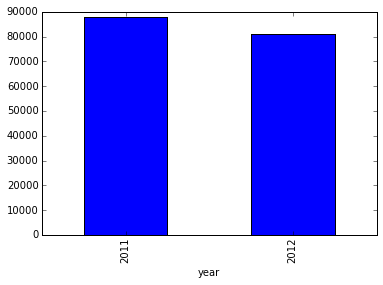

In [10]:
usersample.groupby('year').year.count().plot(kind='bar')

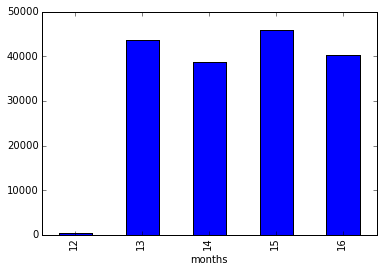

In [11]:
usersample.groupby('months').year.count().plot(kind='bar')

In [12]:
usersample.columns

Index([u'ITEM_COUNT', u'I_DATE', u'SMALL_AREA_NAME', u'PURCHASEID_hash',
       u'USER_ID_hash', u'COUPON_ID_hash', u'year', u'months'],
      dtype='object')

In [13]:
usercouponmap=usersample.groupby(['COUPON_ID_hash','USER_ID_hash']).ITEM_COUNT.sum()

In [14]:
usercouponmap=usercouponmap.reset_index()

In [15]:
couponusercount=usercouponmap.groupby('COUPON_ID_hash').USER_ID_hash.count()

In [16]:
couponusercount.sort(ascending=False)

In [17]:
couponusercount.head()

COUPON_ID_hash
a262c7ff56a5cd3de3c5c40443f3018c    5760
3d9029d3ec66802b11ee2645dc16e8cb    1511
09411858ae07c0be91aeeddacf4556b4    1016
7fc6567f470af5356ae97097dbe18486     863
bf69bd9e0e26fa1f62243d1fcada38f1     663
Name: USER_ID_hash, dtype: int64

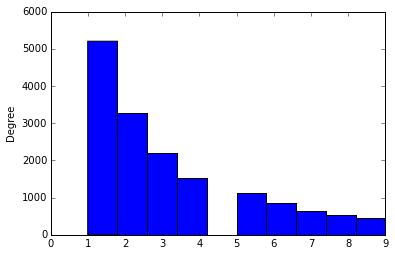

In [21]:
couponusercount[couponusercount<10].plot(kind='hist')

In [22]:
couponusercount.sort(ascending=True)

In [23]:
couponusercount.head()

COUPON_ID_hash
000eba9b783cec10658308b5836349f6    1
aa5dd2f7086cf40a67168ab92c4562c2    1
aa6975095d560058f8b7ab1288357282    1
aa731cc1a585cfee4b7749128c4ac9e5    1
aa7576dbface142f01aaa8194c8cb462    1
Name: USER_ID_hash, dtype: int64

In [24]:
usersample.I_DATE.isnull().sum()

0